# Single perceptron

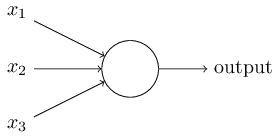

Image source: www.analyticsvidhya.com

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
sample_input  = np.array([[1,0,1,0],[1,0,1,1],[0,1,0,1]])
sample_output = np.array([[1],[1],[0]])

In [4]:
sample_input.shape

(3, 4)

In [5]:
sample_output.shape

(3, 1)

### Note: According to the simple working of above perceptron, the output will be summetion (let take S) of all inputs. Means if S>0 output  = 1 otherwise 0.

In [6]:
S = np.sum(sample_input)
S

7

To do the matrix sum refer: https://numpy.org/doc/stable/reference/generated/numpy.matrix.sum.html

In [8]:
S = sample_input.sum(axis=1)
S

array([2, 3, 2])

In [10]:
S.shape

(3,)

In [12]:
#np.reshape(a, (2, 3))
np.reshape(S,(3,1))
S.shape

(3,)

In [14]:
def pred_output(x):
    for i in range(3):
        if x[i]>0:
            S[i] = 1
        else:
            S[i] = 0
    return S

In [15]:
pred_output = pred_output(S)

In [16]:
pred_output

array([1, 1, 1])

So, above concept of perceptron then implemented with weights, bias and activation function, which we called as Artificial Neural Network (ANN).

# First ANN

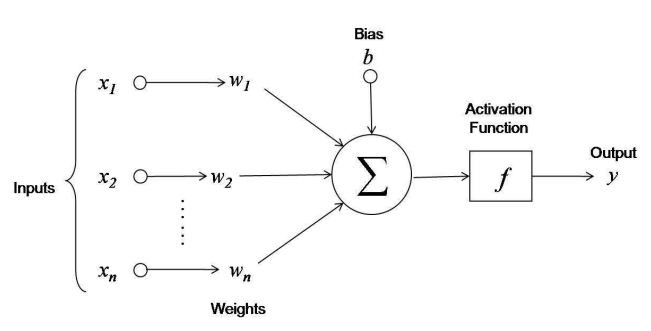

Image source: towardsdatascience.com

#### Forward Propagation

In [32]:
# We have sample inputs and outputs now we need weights, bias value and activation function

# Take Weights

# Ref: https://numpy.org/doc/stable/reference/random/generated/numpy.random.rand.html?highlight=random

weights = np.random.rand(4,1)
weights

array([[0.43997868],
       [0.22913357],
       [0.60719125],
       [0.79938344]])

In [34]:
sample_input.shape

(4, 3)

In [35]:
weights.shape

(4, 1)

In [36]:
# transforming inputs in the shape of weights
sample_input = sample_input.T
sample_input.shape

(3, 4)

In [37]:
#have a look on values
print(sample_input)
print(weights)

[[1 0 1 0]
 [1 0 1 1]
 [0 1 0 1]]
[[0.43997868]
 [0.22913357]
 [0.60719125]
 [0.79938344]]


In [38]:
# Summetions i.e in y=mx+c preparing m*x
summ = np.matrix.dot(sample_input,weights)
summ

array([[1.04716993],
       [1.84655337],
       [1.02851701]])

In [39]:
# Activation function 

def sigmoid(x):
    return 1/(1+np.exp(-x))

In [40]:
# execution of activation function with summetion and bias value
predicted_output = sigmoid(summ + 0.02)
predicted_output

array([[0.74405834],
       [0.86605897],
       [0.74049002]])

#### Backward Propagation

In [41]:
# error
error = sample_output-predicted_output
error

array([[ 0.25594166],
       [ 0.13394103],
       [-0.74049002]])

In [42]:
# first order derivative i.e. converting output of sigmoid function to its derivative
def derivative(x):
  return x * (1-x)

In [48]:
# updation in weights or called as adjustments in weights or simply called as adjusted weights
adjustment = error * derivative(error)
weights = weights + np.dot(sample_input.T,adjustment)

In [49]:
weights

array([[0.50425633],
       [1.18348859],
       [0.67146891],
       [1.76927573]])

In [53]:
# now move towards activation function and predict the output again then check the new error
summ = np.dot(sample_input,weights)
predicted_output = sigmoid(summ + 0.02)
erorr = sample_output - predicted_output
erorr

array([[ 0.23223654],
       [ 0.04903229],
       [-0.95132843]])

In [54]:
predicted_output

array([[0.76776346],
       [0.95096771],
       [0.95132843]])

In [56]:
np.round(predicted_output)

array([[1.],
       [1.],
       [1.]])

In [102]:
# Now lets repete the forward and back progation till we get desired out put i.e. 1,1,0

sample_input  = np.array([[1,0,1],[1,1,1],[0,1,0]])
sample_output = np.array([[1],[1],[0]])
weights = np.random.rand(3,1)
#sample_input = sample_input.T

# Activation function 
def sigmoid(x):
    return 1/(1+np.exp(-x))
# first order derivative i.e. converting output of sigmoid function to its derivative
def derivative(x):
  return x * (1-x)

for i in range(500):
    summ = np.dot(sample_input,weights)
    predicted_output = sigmoid(summ + 0.01)
    erorr = sample_output - predicted_output
    adjustment = error * derivative(error)
    weights = weights + np.dot(sample_input.T,adjustment)
predicted_output.round()

array([[1.],
       [1.],
       [1.]])

Note: I was doing basic mistake...may be. So lets take the help of my another implemented code


In [97]:
input_samples = np.array([[1,0,1],[1,1,1],[0,1,0]])
output_samples = np.array([[1],[1],[0]])
weights = np.random.random((3,1))
def activation(x):
  return 1 / (1 + np.exp(-x))
def derivative(x):
  return x * (1-x)
for i in range(500):
  sum = np.dot(input_samples,weights)
  predicted_output = activation(sum + 0.01)
  error = output_samples - predicted_output
  adjustments = error * derivative(predicted_output)  ### gradient descent
  weights += np.dot(input_samples.T,adjustments)
predicted_output.round()

array([[1.],
       [1.],
       [0.]])

Now, lets find the mistake in above two implementation

In [100]:
# First code
'''
sample_input  = np.array([[1,0,1],[1,1,1],[0,1,0]])
sample_output = np.array([[1],[1],[0]])
weights = np.random.rand(3,1)
def sigmoid(x):
    return 1/(1+np.exp(-x))
def derivative(x):
  return x * (1-x)
for i in range(500):
    summ = np.dot(sample_input,weights)
    predicted_output = sigmoid(summ + 0.01)
    erorr = sample_output - predicted_output
    adjustment = error * derivative(error)
    weights = weights + np.dot(sample_input.T,adjustment)
predicted_output.round()
'''

# Second
'''
input_samples = np.array([[1,0,1],[1,1,1],[0,1,0]])
output_samples = np.array([[1],[1],[0]])
weights = np.random.random((3,1))
def activation(x):
  return 1 / (1 + np.exp(-x))
def derivative(x):
  return x * (1-x)
for i in range(500):
  sum = np.dot(input_samples,weights)
  predicted_output = activation(sum + 0.01)
  error = output_samples - predicted_output
  adjustments = error * derivative(predicted_output)  ### gradient descent
  weights += np.dot(input_samples.T,adjustments)
predicted_output.round()
'''

# Lets write the diference quickly

### Line 3: use of random function -> lets check the outputs of each then compare
weights1 = np.random.rand(3,1)
weights2 = np.random.random((3,1))
print(weights1)
print(weights2)

[[0.33392007]
 [0.88060932]
 [0.50104898]]
[[0.03232062]
 [0.66329649]
 [0.88861603]]


The above code does not make any sense...may be. So, lets find out another diferrence

In [103]:
### Line 13: Only difference in first code simple update in variable is used and in secong code the shorthand is used
### So lets take quick look via simple example

x = 3.5463

def check1(x):
    for i in range(500):
        x = x + 0.01
    return x


def check2(x):
    for i in range(500):
        x += 0.01
    return x
print(check1(x),check2(x))

8.546299999999894 8.546299999999894


Nothing prooved with this example...it says no issue....so lets embedded into fisrt code then see what will happen

In [104]:
sample_input  = np.array([[1,0,1],[1,1,1],[0,1,0]])
sample_output = np.array([[1],[1],[0]])
weights = np.random.rand(3,1)
#sample_input = sample_input.T

# Activation function 
def sigmoid(x):
    return 1/(1+np.exp(-x))
# first order derivative i.e. converting output of sigmoid function to its derivative
def derivative(x):
  return x * (1-x)

for i in range(500):
    summ = np.dot(sample_input,weights)
    predicted_output = sigmoid(summ + 0.01)
    erorr = sample_output - predicted_output
    adjustment = error * derivative(error)
    weights += np.dot(sample_input.T,adjustment)
predicted_output.round()

array([[1.],
       [1.],
       [1.]])

Now lets correct the line 3 difference then see

In [105]:
sample_input  = np.array([[1,0,1],[1,1,1],[0,1,0]])
sample_output = np.array([[1],[1],[0]])
weights = np.random.random((3,1))
#sample_input = sample_input.T

# Activation function 
def sigmoid(x):
    return 1/(1+np.exp(-x))
# first order derivative i.e. converting output of sigmoid function to its derivative
def derivative(x):
  return x * (1-x)

for i in range(500):
    summ = np.dot(sample_input,weights)
    predicted_output = sigmoid(summ + 0.01)
    erorr = sample_output - predicted_output
    adjustment = error * derivative(error)
    weights = weights + np.dot(sample_input.T,adjustment)
predicted_output.round()

array([[1.],
       [1.],
       [1.]])

now lets correct both difference

In [106]:
sample_input  = np.array([[1,0,1],[1,1,1],[0,1,0]])
sample_output = np.array([[1],[1],[0]])
weights = np.random.random((3,1))
#sample_input = sample_input.T

# Activation function 
def sigmoid(x):
    return 1/(1+np.exp(-x))
# first order derivative i.e. converting output of sigmoid function to its derivative
def derivative(x):
  return x * (1-x)

for i in range(500):
    summ = np.dot(sample_input,weights)
    predicted_output = sigmoid(summ + 0.01)
    erorr = sample_output - predicted_output
    adjustment = error * derivative(error)
    weights  += np.dot(sample_input.T,adjustment)
predicted_output.round()

array([[1.],
       [1.],
       [1.]])

In [107]:
# Finally got the error -> in adjustment i put error in place of predicted output

### Final CODE
sample_input  = np.array([[1,0,1],[1,1,1],[0,1,0]])
sample_output = np.array([[1],[1],[0]])
weights = np.random.random((3,1))
#sample_input = sample_input.T

# Activation function 
def sigmoid(x):
    return 1/(1+np.exp(-x))
# first order derivative i.e. converting output of sigmoid function to its derivative
def derivative(x):
  return x * (1-x)

for i in range(500):
    summ = np.dot(sample_input,weights)
    predicted_output = sigmoid(summ + 0.01)
    erorr = sample_output - predicted_output
    adjustment = error * derivative(predicted_output)
    weights  += np.dot(sample_input.T,adjustment)
predicted_output.round()

array([[1.],
       [1.],
       [0.]])